In [1]:
#HIDDEN


from __future__ import print_function
import matplotlib.pyplot as plt
import numpy as np

import obspy
from obspy import read
import random
from obspy.geodetics import locations2degrees, gps2dist_azimuth
import obspy.signal.array_analysis as aa
import obspy.signal.util as su
from obspy import read
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hilbert, chirp


#5th station - Central station
#Rotational components of 1st station in x, y and z direction
st5_curlx = read('/home/ashah/Desktop/3MayOutput/S5.curlx')
st5_curly = read('/home/ashah/Desktop/3MayOutput/S5.curly')
st5_curlz = read('/home/ashah/Desktop/3MayOutput/S5.curlz')

#Translation components of displacement in x, y and z direction
st5_x = read('/home/ashah/Desktop/3MayOutput/S5.x')
st5_y = read('/home/ashah/Desktop/3MayOutput/S5.y')
st5_z = read('/home/ashah/Desktop/3MayOutput/S5.z')

#Translation components of velocity in x, y and z direction
st5_xv = read('/home/ashah/Desktop/3MayOutput/S5.xv')
st5_yv = read('/home/ashah/Desktop/3MayOutput/S5.yv')
st5_zv = read('/home/ashah/Desktop/3MayOutput/S5.zv')


Text(0.5, 1.0, 'Rotation X Component')

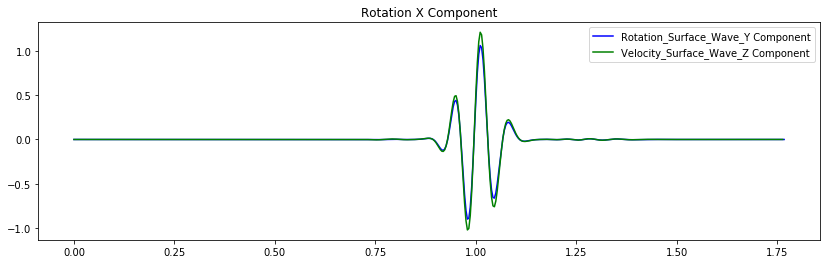

In [2]:
fig = plt.figure(figsize=(14,4))                          #Plotting Rotations Surface Wave X component
fig.add_subplot()
plt.plot(st5_curlx[0].times(), st5_curly[0].data*1250, color = 'b',label='Rotation_Surface_Wave_Y Component')
plt.plot(st5_zv[0].times(), st5_zv[0].data, color = 'g',label='Velocity_Surface_Wave_Z Component')
plt.legend()
plt.title("Rotation X Component")


0.000432371674008
1.23139226895
2847.9947762


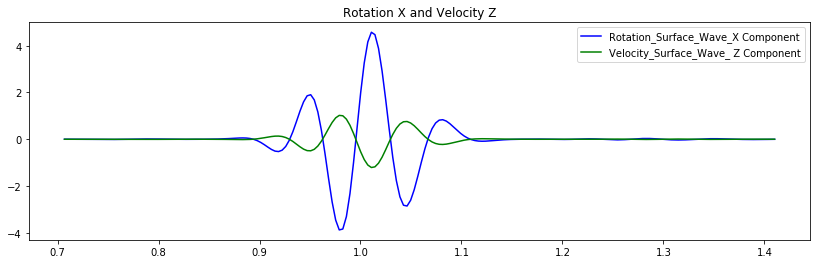

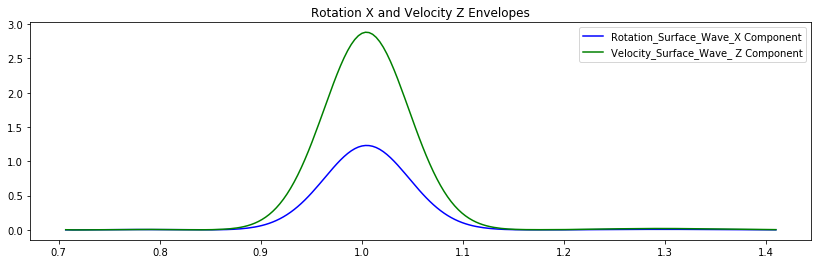

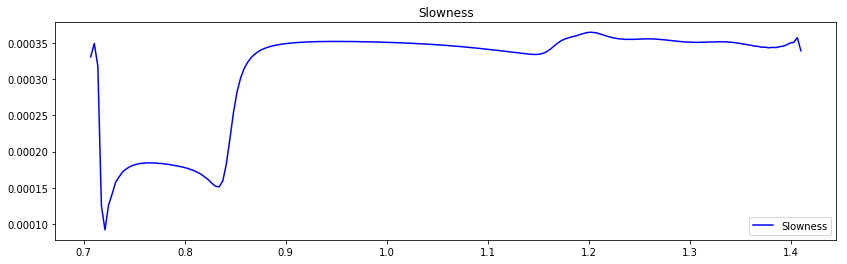

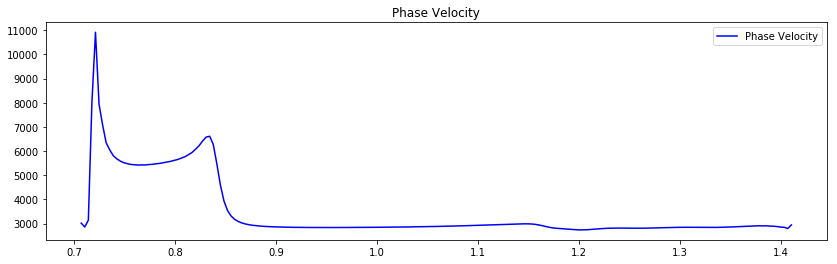

In [3]:
import math



#Transformed_Components_Rotation[abs(Transformed_Components_WI_Rotation) < tol] = 0.0
#Transformed_Components_Spud_Rotation[abs(Transformed_Components_WI_Rotation) < tol] = 0.0



st5_curly_SurfaceWave = (st5_curly[0].data[200:400])/2      #Surface Wave Rotations  X Component
st5_curly_SurfaceWave_Hilbert = hilbert(st5_curly_SurfaceWave)
amp_envlp_curlY_surface = np.abs(st5_curly_SurfaceWave_Hilbert)


st5_times_SurfaceWave = st5_curlx[0].times()[200:400]      #Time Axis
st5_zv_SurfaceWave = -st5_zv[0].data[200:400]              #Surface Wave Velocity Z component
st5_zv_SurfaceWave_Hilbert = hilbert(st5_zv_SurfaceWave)
amp_envlp_velZ_surface = np.abs(st5_zv_SurfaceWave_Hilbert)
#print(len(amp_envlp_curlX_surface))
#print(min(amp_envlp_velZ_surface))

#print(min(amp_envlp_velZ_surface))

#to1 = 3.01491554e-03
#to2 = 2e+3
#print(to2)
Slowness = amp_envlp_curlY_surface/amp_envlp_velZ_surface     # (Rx)/(Vz)  # Slowness

PhaseVelocity = 1/Slowness  #*math.cos(45*180/math.pi)
#PhaseVelocity[abs(PhaseVelocity) < to2] = np.nan

#Slowness Vector

fig = plt.figure(figsize=(14,4))                          #Plotting Rotations Surface Wave X component
fig.add_subplot()
plt.plot(st5_times_SurfaceWave, st5_curly_SurfaceWave*10800, color = 'b',label='Rotation_Surface_Wave_X Component')
plt.plot(st5_times_SurfaceWave, st5_zv_SurfaceWave, color = 'g',label='Velocity_Surface_Wave_ Z Component')
plt.legend()
plt.title("Rotation X and Velocity Z")

fig = plt.figure(figsize=(14,4))                          #Plotting Rotations Surface Wave X component
fig.add_subplot()
plt.plot(st5_times_SurfaceWave, amp_envlp_velZ_surface, color = 'b',label='Rotation_Surface_Wave_X Component')
plt.plot(st5_times_SurfaceWave, amp_envlp_curlY_surface*6666, color = 'g',label='Velocity_Surface_Wave_ Z Component')
plt.legend()
plt.title("Rotation X and Velocity Z Envelopes")


fig = plt.figure(figsize=(14,4))   #Plotting Slowness vector 
fig.add_subplot()
plt.plot(st5_times_SurfaceWave, Slowness, color = 'b',label='Slowness')  #
plt.legend()
plt.title("Slowness")

fig = plt.figure(figsize=(14,4))   #Plotting Phase Velocity vector 
fig.add_subplot()
plt.plot(st5_times_SurfaceWave, PhaseVelocity, color = 'b',label='Phase Velocity')
plt.legend()
plt.title("Phase Velocity")


max_Ratio = max(amp_envlp_velZ_surface)/max(amp_envlp_curlY_surface)
max_Ratio = max_Ratio #* math.sin(45*math.pi/180)
print(max(amp_envlp_curlY_surface))
print(max(amp_envlp_velZ_surface))
print(max_Ratio)


In [4]:
print(Slowness)

[  3.31212017e-04   3.49672176e-04   3.18309368e-04   1.24793451e-04
   9.16236565e-05   1.26054709e-04   1.41257987e-04   1.57824499e-04
   1.65390003e-04   1.72263248e-04   1.76158705e-04   1.79229659e-04
   1.81328378e-04   1.82607532e-04   1.83703275e-04   1.84019864e-04
   1.84491834e-04   1.84248752e-04   1.84305622e-04   1.83734503e-04
   1.83475870e-04   1.82709800e-04   1.82178255e-04   1.81281517e-04
   1.80471890e-04   1.79439517e-04   1.78282715e-04   1.77006869e-04
   1.75335672e-04   1.73590206e-04   1.71092929e-04   1.68486098e-04
   1.64742379e-04   1.60847675e-04   1.55947616e-04   1.52023077e-04
   1.51251913e-04   1.59285559e-04   1.82644727e-04   2.17555724e-04
   2.54019689e-04   2.82529093e-04   3.01873591e-04   3.15006071e-04
   3.23912169e-04   3.30369507e-04   3.35087345e-04   3.38619444e-04
   3.41329973e-04   3.43399162e-04   3.45062772e-04   3.46363027e-04
   3.47450678e-04   3.48325567e-04   3.49074133e-04   3.49691274e-04
   3.50221702e-04   3.50667834e-04

In [5]:
print(PhaseVelocity)



[  3019.21412709   2859.82148131   3141.59777081   8013.24099208
  10914.21188216   7933.06339028   7079.24570783   6336.15190559
   6046.31466555   5805.06877651   5676.69930584   5579.43369344
   5514.85658262   5476.22538458   5443.56110445   5434.19593775
   5420.29409576   5427.44518915   5425.77046272   5442.63590246
   5450.30800319   5473.16016992   5489.12930931   5516.28217778
   5541.02913444   5572.90844617   5609.06873399   5649.49826164
   5703.34598381   5760.69364887   5844.77692135   5935.2077708
   6070.08350337   6217.06219408   6412.40966895   6577.94870334
   6611.48664432   6278.03303462   5475.11015696   4596.52351225
   3936.70272287   3539.45850078   3312.6448646    3174.54199114
   3087.25665684   3026.91373889   2984.29652713   2953.16768984
   2929.7163415    2912.0630218    2898.02343674   2887.14419043
   2878.1063443    2870.87740521   2864.72100564   2859.66529746
   2855.33418916   2851.7015304    2848.61561945   2846.00840226
   2843.83557427   2842.01